In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [2]:
loan_train = pd.read_csv(r'C:\Users\steph\MLDS Baruch\loan-train.csv')
loan_test = pd.read_csv(r'C:\Users\steph\MLDS Baruch\loan-test.csv')


### Dataset Key Information.

- Loan_ID--------------> Unique Loan ID.
- Gender --------------> Male/ Female
- Married --------------> Applicant married (Y/N)
- Dependents ------------> Number of dependents
- Education -------------> Applicant Education (Graduate/ Under Graduate)
- Self_Employed ---------> Self-employed (Y/N)
- ApplicantIncome -------> Applicant income
- CoapplicantIncome -----> Coapplicant income
- LoanAmount -----------> Loan amount in thousands
- Loan_Amount_Term ------> Term of a loan in months
- Credit_History --------> Credit history meets guidelines
- Property_Area ---------> Urban/ Semi-Urban/ Rural
- Loan_Status -----------> Loan approved (Y/N)

In [3]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Print out the entire dataset
loan_train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
print("Rows: ", len(loan_train))
print("Columns: ", len(loan_train.columns))
print("Shape : ", loan_train.shape)

Rows:  614
Columns:  13
Shape :  (614, 13)


In [6]:
loan_train_columns = loan_train.columns # assign to a variable
loan_train_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Analyzing Numerical Variables


First of all we use the loan_train.describe() method to shows the important information from the dataset
It provides the count, mean, standard deviation (std), min, quartiles and max in its output.

In [7]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Another method is info(), This method show us the information about the dataset, Like

1. What's the type of column:
- How many rows available in the dataset?
- What features are there?
- How many null values available in the dataset?
- And so on...

In [8]:
loan_train.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Analyzing Categorical Variables


In [9]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [10]:
loan_train = loan_train.drop(columns=['Loan_ID']) ## Dropping Loan ID
loan_train.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
loan_train_columns = loan_train.columns

for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


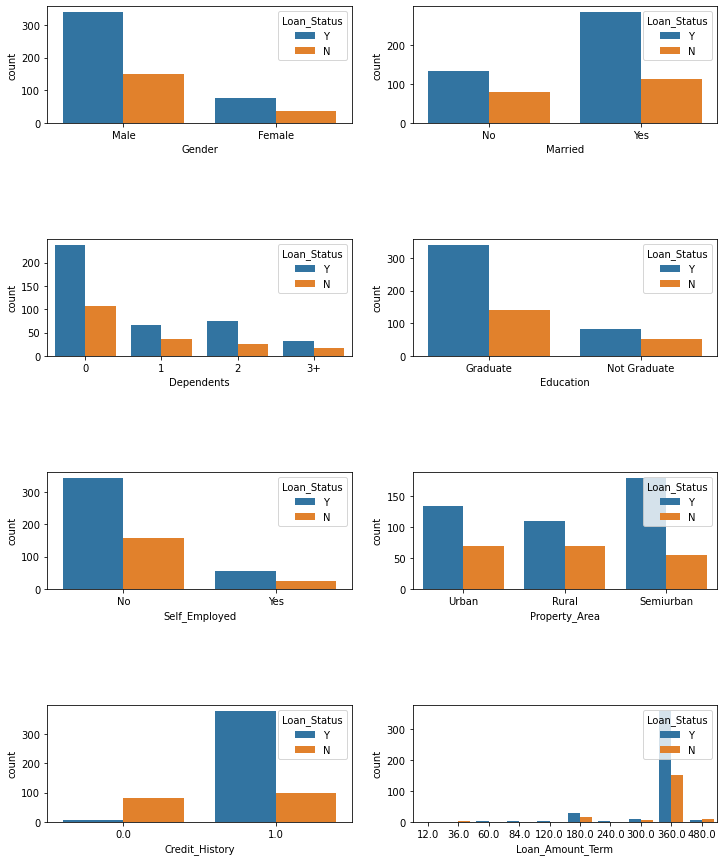

In [12]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 
                       'Self_Employed', 'Property_Area', 'Credit_History',
                       'Loan_Amount_Term']

# create a 4x2 grid of subplots (8 in total) with a specified figure size.                   
fig,axes = plt.subplots(4,2,figsize=(12,15))

#  The code iterates over each categorical column in categorical_columns 
# using enumerate to get both the index (idx) and the column name (cat_col).
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_train,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)


#### Finding Outliers


C:\Users\steph\anaconda3\anaconda3_2nd\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\steph\anaconda3\anaconda3_2nd\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


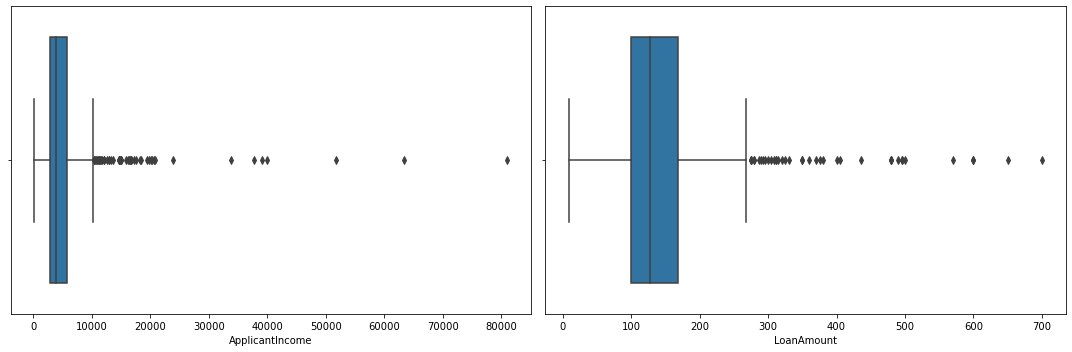

In [13]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(loan_train[col])
plt.tight_layout()
plt.show()


In [14]:
## Male vs. Female Loan Amounts

loan_train.groupby('Gender').mean()['LoanAmount']

Gender
Female    126.697248
Male      149.265957
Name: LoanAmount, dtype: float64

In [15]:
loan_train.groupby(['Married', 'Gender']).mean()['LoanAmount']

Married  Gender
No       Female    116.115385
         Male      136.088000
Yes      Female    153.322581
         Male      154.011662
Name: LoanAmount, dtype: float64

### Correlation Matrix


C:\Users\steph\AppData\Local\Temp/ipykernel_25336/2885840100.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00,-0.12,0.57,-0.05,-0.01
CoapplicantIncome,-0.12,1.00,0.19,-0.06,-0.00
LoanAmount,0.57,0.19,1.00,0.04,-0.01
Loan_Amount_Term,-0.05,-0.06,0.04,1.00,0.00
Credit_History,-0.01,-0.00,-0.01,0.00,1.00


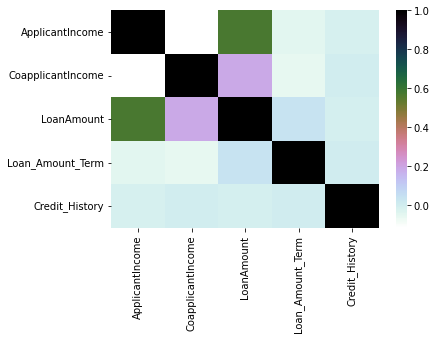

In [16]:
#plotting the correlation matrix
sns.heatmap(loan_train.corr() ,cmap='cubehelix_r')

#correlation table
corr = loan_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

### Preprocessing 


The get_dummies function in Pandas allows us to convert categorical variables into a binary numerical representation, also known as one-hot encoding. 

One-hot encoding is an important step for preparing your dataset for use in machine learning. One-hot encoding turns your categorical data into a binary vector representation.
- Each binary column indicates whether a specific category is present in the original data or not. 

The point of get_dummies() in Pandas is to change these categories into 0s and 1s, making it easier for computer programs to understand and work with the data.

One major drawback, however, is that it creates significantly more data. Because of this, it shouldn’t be used when there are too many categories.

**Learn more:**
- https://www.geeksforgeeks.org/python-pandas-get_dummies-method/
- https://datagy.io/pandas-get-dummies/


In [17]:
train_df_encoded = pd.get_dummies(loan_train,drop_first=True)
train_df_encoded.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [18]:
encoded_columns = train_df_encoded.columns.tolist()
print(encoded_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y']


#### Handling missing values
Missing data values are almost inevitable in every real-world dataset and practically impossible to avoid in typical data gathering processes.

This can occur for various reasons, such as errors during data entry, issues on the technical front in the data collection process, lost/corrupt files, and many other reasons.

While the presence of missing data can truly be frustrating, its outright elimination from the dataset may not always be the right way to proceed.

- https://towardsdatascience.com/why-you-should-handle-missing-data-and-heres-how-to-do-it-270c321a4d6f

In [19]:
loan_train.isna().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
for column in encoded_columns:
    median_value = train_df_encoded[column].median()
    train_df_encoded[column].fillna(median_value, inplace=True)

In [21]:
for column in encoded_columns:
  print("Count of Null Values in <{0}>: <{1}>".format(column,train_df_encoded[column].isnull().sum()))


Count of Null Values in <ApplicantIncome>: <0>
Count of Null Values in <CoapplicantIncome>: <0>
Count of Null Values in <LoanAmount>: <0>
Count of Null Values in <Loan_Amount_Term>: <0>
Count of Null Values in <Credit_History>: <0>
Count of Null Values in <Gender_Male>: <0>
Count of Null Values in <Married_Yes>: <0>
Count of Null Values in <Dependents_1>: <0>
Count of Null Values in <Dependents_2>: <0>
Count of Null Values in <Dependents_3+>: <0>
Count of Null Values in <Education_Not Graduate>: <0>
Count of Null Values in <Self_Employed_Yes>: <0>
Count of Null Values in <Property_Area_Semiurban>: <0>
Count of Null Values in <Property_Area_Urban>: <0>
Count of Null Values in <Loan_Status_Y>: <0>


### Models 
1. Support Vector Machine Classifier (SVM) 

- Use SVM when you have a small to medium-sized dataset.
- SVM is effective when the decision boundary between classes is not simple or linear. It can handle complex relationships in the data.
- Particularly useful when dealing with high-dimensional spaces.

2. Logistic Regression

- Logistic Regression is suitable for binary classification problems (two classes).
- It is easy to interpret and doesn't require a large amount of computational resources.
- When the relationship between the dependent and independent variables is approximately linear.

3. Decision Trees
- Decision Trees are versatile and can be used for both classification and regression tasks.
- Useful when dealing with non-linear relationships and interactions between features.
- Decision Trees are interpretable and can be visualized, making them useful for understanding feature importance.

4. k-Nearest Neighbors (KNN)

- KNN is a simple and intuitive algorithm suitable for small to medium-sized datasets.
- It works well when the decision boundary is not well-defined or when the classes have complex patterns.
- It can be computationally expensive for large datasets.

5. Random Forest

- Random Forest is an ensemble method that combines multiple decision trees for improved accuracy and generalization.
- Suitable for both classification and regression tasks.
- Effective in handling large datasets and high-dimensional feature spaces.
- Resistant to overfitting and performs well in a variety of scenarios.


### Logistic Regression

- Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, and True / False) given a set of independent variables. 
- To represent binary / categorical outcome, we use dummy variables. 

You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable.

In [22]:
## ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 
# 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
# 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 
# 'Property_Area_Urban', 'Loan_Status_Y']


# Data preprocessing
# Define features and target variable
X = train_df_encoded.drop('Loan_Status_Y', axis=1)
y = train_df_encoded['Loan_Status_Y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize numerical features
# # https://thecleverprogrammer.com/2020/09/22/standardscaler-in-machine-learning/
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Confusion Matrix
Error Analysis:

False Positives and False Negatives: By breaking down the predictions into categories like true positives, true negatives, false positives, and false negatives, the confusion matrix helps in understanding the types of errors your model is making. This insight is crucial for refining and optimizing the model.
- https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

In [23]:
cm = confusion_matrix(y_test, y_pred)

# print(len(y_test))
# print(len(y_pred))


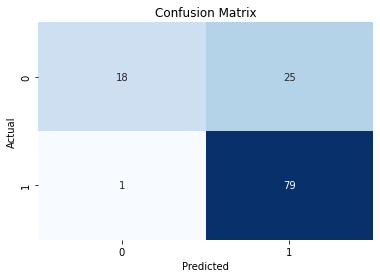

In [24]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Other Ways to Check Model Accuracy
1. Receiver Operating Characteristic (ROC) Curve:

- The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate. The area under the ROC curve (AUC-ROC) is a useful summary statistic that quantifies the overall performance of the model.

2. Precision-Recall (PR) Curve:

- Similar to the ROC curve, the PR curve is a graphical representation of the trade-off between precision and recall. The area under the PR curve (AUC-PR) provides a comprehensive evaluation of a model's performance, especially in imbalanced datasets.

### Test Data
Now we see how the model performs for data that the model has not seen yet
- By making predictions on the testing or validation dataset and comparing the predictions to the actual labels, you can assess how well the model generalizes to new, unseen data.

#### Preprocessing (Once again)
- Preprocess the training data (drop irrelevant columns, handle missing values, etc.)
- Make sure to apply the same preprocessing steps as done for the training data


In [25]:
# Following the same steps

loan_test = loan_test.drop(columns=['Loan_ID']) 
loan_test_columns = loan_test.columns.tolist()
print(loan_test_columns)

print(loan_test.isna().sum())

test_df_encoded = pd.get_dummies(loan_test,drop_first=True)
print(test_df_encoded.head())

test_columns_encoded = test_df_encoded.columns.tolist()


for column in test_columns_encoded:
    median_value = test_df_encoded[column].median()
    test_df_encoded[column].fillna(median_value, inplace=True)
    
for column in test_columns_encoded:
  print("Count of Null Values in <{0}>: <{1}>".format(column,test_df_encoded[column].isnull().sum()))



['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0            1            1   

In [26]:
# # Make predictions using the logistic regression model
# predictions = model.predict(test_df_encoded)

# # Assign the predictions to a new column 'loan_status_predicted' in 'train_df'
# test_df_encoded['loan_status_predicted'] = predictions


# print(test_df_encoded)


### Decision Trees


In [27]:
### Splitting features and target variables
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

### Splitting into Train - Test Data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

### Handling missing values
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [28]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6345196392182603
Validation Mean Accuracy:  0.6680684394970109


#### What are we looking at 
First we print the accuracy and F1 score of the model on the training set.
- accuracy_score measures the proportion of correctly classified instances.
- f1_score is the harmonic mean of precision and recall and is useful in imbalanced datasets.

Then, we use cross-validation to estimate the model's performance on the validation set.
- cross_val_score performs k-fold cross-validation (here, k=5).
- 'f1_macro' scoring is used for F1 score, and 'accuracy' scoring is used for accuracy.
- Prints the mean F1 score and mean accuracy across the folds.

##### Overfitting Problem

We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning tosee if it helps

In [29]:
#  Prediction Summary
# print(classification_report(y_test, y_pred))

# # Accuracy score
# DT_SC = accuracy_score(y_pred,y_test)
# print(f"{round(DT_SC*100,2)}% Accurate")

In [30]:
print(len(y_test), len(y_pred))


123 491
